### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 2 June 2023 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 2 June 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA8001_superhosts`
- Team Leader and Team Member 1: `Felix Rosenberger`
- Team Member 2: `John Rizk`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12](https://www.kaggle.com/t/a154f28787174b628a2b7eaa238a5c12)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


In [55]:
# Task 1 code here
import pandas as pd
import numpy as np

# setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', None)

# read in data
trainpath = "train.csv"
df_train = pd.read_csv(trainpath, index_col='ID')
testpath = "test.csv"
df_test = pd.read_csv(testpath, index_col='ID')

# concatenate dataframes to reduce redundancies in operations
df = pd.concat([df_train, df_test])

#df.head()

df.to_csv("df_1.csv")


In [56]:
# data summary and characteristics
df['price'].describe()
df.info()
df.dtypes.value_counts().to_frame()
#print(len(df.columns))
# types of variables / features
#vtypes = df.dtypes.to_frame()
#vtypes.value_counts()
#vtypes

#print(df.shape[1])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        10000 non-null  object 
 1   name                                          9999 non-null   object 
 2   description                                   9912 non-null   object 
 3   neighborhood_overview                         6753 non-null   object 
 4   host_name                                     10000 non-null  object 
 5   host_since                                    10000 non-null  object 
 6   host_location                                 7950 non-null   object 
 7   host_about                                    6289 non-null   object 
 8   host_response_time                            9263 non-null   object 
 9   host_response_rate                            9263 non-null   

,0
object,27
float64,18
int64,15


In [57]:
df = pd.concat([df_train, df_test])
df['price'] = df.price.str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype('float')
d = df.groupby('neighbourhood_cleansed')['price'].describe().round(2)
#d = df.groupby(['property_type','bathrooms'])['price'].describe().round(2)

#d = df.groupby('property_type')['price'].mean().dropna().round(2)
d.sort_values(by=['mean'], inplace=True, ascending=False)
#d.sort_values(by=['count'], inplace=True, ascending=False)
d
#df['price']
print(min(df['price']))
print(max(df['price']))

25.0
145160.0


In [58]:
# missing values
missing_values_count_train = pd.DataFrame(df_train.isnull().sum(axis=0)).loc[df_train.isnull().sum(axis=0) != 0]

missing_values_count_test = pd.DataFrame(df_test.isnull().sum(axis=0)).loc[df_test.isnull().sum(axis=0) != 0]

missing_values_count = pd.merge(missing_values_count_train, missing_values_count_test, how='outer', left_index=True, right_index=True)
missing_values_count.fillna(0, inplace=True)
missing_values_count = missing_values_count.rename(columns={'0_x': 'missing_train', '0_y': 'missing_test'})
missing_values_count['total_missing'] = missing_values_count['missing_train'] + missing_values_count['missing_test']

print('Total Missing records = ', sum(missing_values_count['total_missing']))

missing_values_count


Total Missing records =  24202.0


,missing_train,missing_test,total_missing
availability_365,47.0,20.0,67.0
bathrooms,6.0,0.0,6.0
bedrooms,378.0,60.0,438.0
beds,72.0,12.0,84.0
description,57.0,31.0,88.0
first_review,0.0,263.0,263.0
host_about,2270.0,1441.0,3711.0
host_acceptance_rate,63.0,658.0,721.0
host_is_superhost,0.0,2.0,2.0
host_location,1280.0,770.0,2050.0


### <font color='darkblue'>Forecasting Problem</font>
<font color='darkblue'>
Aiirbnb is an "online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales." https://www.investopedia.com/articles/personal-finance/032814/pros-and-cons-using-airbnb.asp

The goal of is this assignment is to develop a model for predicting nightly prices of Melbournd based Airbnb listings with different features and characteristics based on statistical machine learning. The model can be used to assess the how rental prices differ based on specific characteristics of the property or against other suburbs, which can then be used to determine the profitability and feasibilty of certain listings.

### Evaluation Criteria
The criteria to assess prediction performance is RMSE. This performance metric measures the average distance between predictions obtained by a model and actual target values. Thus, the lower the distance (and the smaller RMSE), the better the prediction quality. It also has the advantage of being in the same unit as the predicted variable which makes it easy to interpret.

### Variables / Features

The data consists of 60 columns, 27 of type object, 18 of type float64 and 15 of type int64 types.
<br>
<br>
The variables types were classified into the following data types, 21 nominal, 12 ordinal and 27 numeric.


### Data Summary and Main Characteristics

Evaluation of the prices suggest that the distribution of prices is skewed with the range of prices between <b>25</b> and <b>145160</b> with a mean of <b>285.65</b>.

Prices appear to be sensitive to property type, with <b>Private room in villa</b> having the highest mean price of <b>2358.36</b> by <b>property type</b>, which is much higher than the mean prices of other property types, suggesting that the distribution of prices for this property type may be highly skewed. <b>Private room in bungalow</b> has the lowest mean price of <b>64.11</b>. 

<b>Entire rental unit</b> have the highest listings <b>2984</b>, and a mean price of <b>296.87</b>, which is close to the overall mean price, while <b>Shared room in guesthouse</b> has the least listings <b>2</b>, and a mean price of <b>67.00</b>.

<b>Boroondara</b> has the highest mean price of <b>894.95</b> by <b>neighbourhood_cleansed</b> and <b>Greater Dandenong</b> has the lowest mean price of <b>115.41</b>. Prices also seem sensitive to neighbourhood_cleansed. <b>Melbourne</b> has the highest listing of <b>2062</b>, and mean price of <b>335.35</b>, and <b>Greater Dandenong</b> has the lowest lisitngs of<b>32</b>.

<b>Instant bookable</b> properties have a slighly higher mean price <b>298.96</b> compared with those that are not instant bookable <b>281.34</b>.

<b>Entire home/apt</b> have the highest listing <b>by room type</b> with a mean price of <b>312.19</b>. <b>Hotel room</b> and <b>Shared room</b> have the least lisitings with a combined total of <b>80</b>.

Prices increase as the number of <b>accomodates</b> increases from 1 to 16, ranging from a mean of <b>81.65</b> to <b>724.04</b>. 

Intial review of the features indicates that price dependant variables may include:
<br>&nbsp;&nbsp;room_type (nominal)
<br>&nbsp;&nbsp;neighbourhood_cleansed (nominal)
<br>&nbsp;&nbsp;accommodates (numeric)
<br>&nbsp;&nbsp;bathrooms (numeric)
<br>&nbsp;&nbsp;bedrooms (numeric)
<br>&nbsp;&nbsp;beds (numeric)
<br>&nbsp;&nbsp;amenities (nominal)
<br>&nbsp;&nbsp;review_scores_rating (ordinal)
<br>&nbsp;&nbsp;instant_bookable (nominal)

### Missing Observation

There are 24202 missing values across 29 variables, spread fairly evenly between the train and data sets.
</font>    

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [59]:
# Data Cleaning

#Functions
def replace_string(df, c, s, r='', f='strip'):
    if f == 'find_replace':
        mask = (df[c].notnull()) & (df[c].astype(str).str.contains(s))
        df.loc[mask, c] = df.loc[mask, c].astype(str).str.replace(s, r)
    if f == 'replace':
        df[c] = df[c].replace(s, r)
    elif f == 'strip':
        df[c] = df[c].dropna().astype(str).str.replace(s, r, regex=True)
    return df

def replace_numeric(df, c, n, r=0, f='match'):
    if f == 'isgreater':
        df.loc[df[c] > n, c] = r
    elif f == 'isless':
        df.loc[df[c] < n, c] = r
    elif f == 'match':
        df.loc[df[c] == n, c] = r
    return df

def convert_numeric(df, c, t, d=1):
    df[c] = pd.to_numeric(df[c], errors='coerce')
    if t == 'float':
      df[c] = df[c].astype(t) // d
    df[c] = df[c].astype(t)
    return df


In [60]:
df2 = df

# price
df2 = replace_string(df2, 'price', '$','', 'strip')
df2 = replace_string(df2, 'price', ',','', 'strip')
df2 = convert_numeric(df2, 'price', 'float', 1)

# host_response_rate
df2 = replace_string(df2, 'host_response_rate', '%','', 'strip')
df2 = convert_numeric(df2, 'host_response_rate', 'float', 100)

# host_acceptance_rate
df2 = replace_string(df2, 'host_acceptance_rate', '%','', 'strip')
df2 = convert_numeric(df2, 'host_acceptance_rate', 'float', 100)

# bathrooms
df2 = replace_string(df2, 'bathrooms', 'Half-bath','0.5', 'find_replace')
df2 = replace_string(df2, 'bathrooms', 'half-bath','0.5', 'find_replace')
df2 = replace_string(df2, 'bathrooms', '[^0-9\.]','', 'strip')
df2 = convert_numeric(df2, 'bathrooms', 'float', 1)

# max/min nights - replace extreme values
df2 = replace_numeric(df2, 'maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'minimum_maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'maximum_maximum_nights', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'minimum_nights_avg_ntm', 9000, 1000, 'isgreater')
df2 = replace_numeric(df2, 'maximum_nights_avg_ntm', 9000, 1000, 'isgreater')

df2.to_csv("df_2.csv")

#### <font color='darkblue'>price Problem</font>
<font color='darkblue'>
The target variable price was converted from a string containing the $ sign to a numeric float variable.
<br>
    
#### <font color='darkblue'>host_response_rate and host_acceptance_rate</font>    
host_response_rate and host_acceptance_rate variables were converted from strings containing the % sign to a numeric float variable.
<br>

#### <font color='darkblue'>bathrooms</font>
Some records for bathrooms were 'Half-bath' and 'half-bath', that is they did not contain any numeric characters. These were converted to the string '0.5'. For the remaining records non-numeric characters were removed and then the whole column was converted to a numeric float variable.
<br>

#### <font color='darkblue'>maximum_nights, minimum_maximum_nights,maximum_maximum_nights and maximum_nights_avg_ntm</font>    
maximum_nights, minimum_maximum_nights,maximum_maximum_nights and maximum_nights_avg_ntm had some extreme values, which appear to be in error - these were replaced with 1000 which appears to be the threshold based on other min/max nights variables.
</font>


**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)

In [61]:
df3 = df2

# Create new features email, phone and work_email from host_verifications
df3 = replace_string(df3, 'host_verifications', "['email']","'1','0','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['phone']","'0','1','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['email', 'phone']","'1','1','0'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['phone', 'work_email']","'0','1','1'", 'replace')
df3 = replace_string(df3, 'host_verifications', "['email', 'phone', 'work_email']","'1','1','1'", 'replace')

df3[['email', 'phone', 'work_email']] = df3['host_verifications'].str.split(',', expand=True)

df3 = replace_string(df3, 'email', "'",'', 'strip')
df3 = convert_numeric(df3, 'email','int', 1)

df3 = replace_string(df3, 'phone', "'",'', 'strip')
df3 = convert_numeric(df3, 'phone','int', 1)

df3 = replace_string(df3, 'work_email', "'",'', 'strip')
df3 = convert_numeric(df3, 'work_email','int', 1)

df3.drop(['host_verifications'], axis=1, inplace=True)

In [62]:
# Create new features smoke_alarm, kitchen, essential, hangers, wifi from amenities
# These are the top 5 ammenities in the dataset

from collections import Counter

amenity_counts = Counter()

for amenities_str in df3['amenities']:
    amenities_list = amenities_str.strip('][').replace('"', '').split(', ')
    for amenity in amenities_list:
        #if amenity in amenities:
            amenity_counts[amenity] += 1

df_amenities = pd.DataFrame(columns=[ 'amenity_counts'])
df_amenities['amenity_counts'] = amenity_counts
df_amenities = df_amenities.sort_values('amenity_counts', ascending=False)
#df_amenities.head(5)

#Smoke alarm	9548
#Kitchen	9383
#Essentials	9327
#Hangers	8702
#Wifi	8618

df3[['smoke_alarm','kitchen','essentials','hangers','wifi']] = 0

for idx, amenities_str in df3['amenities'].items():
    amenities_list = amenities_str.strip('][').replace('"', '').split(', ')
    if 'Smoke alarm' in amenities_list:
        df3.loc[idx, 'smoke_alarm'] = 1
    if 'Kitchen' in amenities_list:
        df3.loc[idx, 'kitchen'] = 1        
    if 'Essentials' in amenities_list:
        df3.loc[idx, 'essentials'] = 1      
    if 'Hangers' in amenities_list:
        df3.loc[idx, 'hangers'] = 1      
    if 'Wifi' in amenities_list:
        df3.loc[idx, 'wifi'] = 1              


#df3.drop(['amenities'], axis=1, inplace=True)

#df3

df3.to_csv("df_3.csv")


### <font color='darkblue'>New Features</font>
<font color='darkblue'>

#### <font color='darkblue'>host_verifications</font>    
Created new binary numeric features 'email', 'phone', 'work_email from 'host_verifications' and deleted the column 'host_verifications'
<br>
    
#### <font color='darkblue'>amenities</font>    
Create new binary numeric features 'smoke_alarm', 'kitchen', 'essential', 'hangers', 'wifi' from 'amenities' which are the top 5 amenities in the dataset and deleted the column 'amenities'.
<br>
</font>

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [63]:
df4 = df3

from sklearn.impute import SimpleImputer

def impute_missing(df, c, s='most_frequent'):
    for col in c:
        i = SimpleImputer(missing_values = np.nan, strategy=s) 
        i = i.fit(df[[col]])
        df[[col]] = i.transform(df[[col]])
    return df

# host_location-> most_frequent
df4 = impute_missing(df4, ['host_location'], 'most_frequent')

# host_response_time -> most_frequent
df4 = impute_missing(df4, ['host_response_time'], 'most_frequent')

# host_response_rate, host_acceptance_rate -> mean
df4 = impute_missing(df4, ['host_response_rate', 'host_acceptance_rate'], 'mean')

# host_is_superhost -> most_frequent
df4 = impute_missing(df4, ['host_is_superhost'], 'most_frequent')

# host_neighbourhood, neighbourhood, neighbourhood_cleansed -> most_frequent
df4 = impute_missing(df4, ['host_neighbourhood', 'neighbourhood', 'neighbourhood_cleansed'], 'most_frequent')

# property_type, room_type -> most_frequent
df4 = impute_missing(df4, ['property_type', 'room_type'], 'most_frequent')

# bathrooms, bedrooms, beds, first_review -> median
df4 = impute_missing(df4, ['bathrooms','bedrooms','beds'], 'median')

# minimum_minimum_nights, maximum_maximum_nights -> median
df4 = impute_missing(df4, ['minimum_minimum_nights', 'maximum_maximum_nights'], 'median')

# availability_365 -> mean
df4 = impute_missing(df4, ['availability_365'], 'mean')

# first_review, last_review -> most_frequent
df4 = impute_missing(df4, ['first_review', 'last_review'], 'most_frequent')

#review_scores_accuracy, review_scores_checkin, review_scores_cleanliness, review_scores_communication, review_scores_location
# review_scores_rating, review_scores_value -> mean
df4 = impute_missing(df4, ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin',
                           'review_scores_communication', 'review_scores_location','review_scores_value'], 'mean')
# reviews_per_month -> mean
df4 = impute_missing(df4, ['reviews_per_month'], 'mean')

# email, phone, work_email from -> most_frequent
df4 = impute_missing(df4, ['email', 'phone', 'work_email'], 'most_frequent')

# smoke_alarm, kitchen, essentials, hangers, wifi -> most_frequent
df4 = impute_missing(df4, ['smoke_alarm', 'kitchen', 'essentials', 'hangers', 'wifi'], 'most_frequent')

#df4

df4.to_csv("df_4.csv")

### <font color='darkblue'>Imputing missing values</font>
<font color='darkblue'>
<br>
Imputed missing values for all features except for 'description', 'neighborhood_overview', 'host_location' and 'host_about'.
<br>
<br>    

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [64]:
#onehot encoder function

def onehot(df, c):
    for col in c:
        df = df.join(pd.get_dummies(df[[col]], drop_first=True))
        df.drop([col], axis=1, inplace=True)
    return df


In [65]:
df5 = df4

#encode binary classifiers
# 'host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable'
df5 = onehot(df5, ['source', 'host_is_superhost','host_has_profile_pic','host_identity_verified','has_availability','instant_bookable'])

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#encode source
#le = encoder.fit_transform(df5['source'].values)
#df5['source'] = le
#print('source:', encoder.classes_)

#encode room_type
le = encoder.fit_transform(df5['room_type'].values)
df5['room_type'] = le
room_type_classes = encoder.classes_


#encode top 5 property_type and other
top_5_property_type = df5['property_type'].value_counts().nlargest(5).index.tolist()  
encoder.fit(top_5_property_type + ['other'])  
df5['property_type_encoded'] = encoder.transform(df5['property_type'].apply(lambda x: x if x in top_5_property_type else 'other'))
df5.drop(['property_type'], axis=1, inplace=True)
df5 = df5.rename(columns={'property_type_encoded': 'property_type'})
property_type_classes = encoder.classes_


#encode top 5 neighbourhood_cleansed and other
top_5_neighbourhood_cleansed = df5['neighbourhood_cleansed'].value_counts().nlargest(5).index.tolist()  
encoder.fit(top_5_neighbourhood_cleansed + ['other'])  
df5['neighbourhood_cleansed_encoded'] = encoder.transform(df5['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighbourhood_cleansed else 'other'))
df5.drop(['neighbourhood_cleansed'], axis=1, inplace=True)
df5 = df5.rename(columns={'neighbourhood_cleansed_encoded': 'neighbourhood_cleansed'})
neighbourhood_cleansed_classes = encoder.classes_


# map/rank host_response_time
host_response_mapping = {'within an hour':1, 'within a few hours':2, 'within a day':3, 'a few days or more':4}
df5['host_response_time'] = df5['host_response_time'].map(host_response_mapping)

# convert host_since into days based on current date
from datetime import datetime
today = datetime.today()
df5['host_since'] = pd.to_datetime(df5['host_since'], format='%Y/%m/%d')
df5['host_since'] = (today - df5['host_since']).dt.days

#df5

df5.to_csv("df_5.csv")

In [66]:
room_type_classes

array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
      dtype=object)

<font color='darkblue'>

* Encoded  binray classifications 
<br>
'source', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable' using onehot encoding.
<br>
<br>
* Encoded 'room_type' using LabelEncoder.
<br>
<br>
* Encoded 'property_type' and 'neighbourhood_cleansed' using LabelEncoder grouped by the top 5 classifications in each and the rese grouped as 'other'
<br>
<br>
* Encoded and ranked host_response_time.
</font>
<br>

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [67]:
import numpy as np

df6 = df5
df6['log_price'] = np.log(df6['price'])
df6.to_csv("df_6.csv")

#df6['exp_price'] = np.exp(df6['log_price'])

#df6

df6.to_csv("df_6.csv")


<br>
<font color='darkblue'>
* Created <b>log_price</b> variable which is the logarithmic transformation of the price variable, to scale the price and reduce the effect of the outliers and make the distribution more normal.
</font>
<br>
<br>

In [68]:
df7 = df6

df7.drop(['name', 'description','neighborhood_overview',#'host_name',
          'host_about','neighbourhood','latitude','longitude'], axis=1, inplace=True)
df7.drop(['host_location', #'host_response_rate','host_acceptance_rate',
          'host_neighbourhood',
          #'host_listings_count'
         ], 
          axis=1, inplace=True)
df7.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)
df7.drop(['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review'], axis=1, inplace=True)
df7.drop(['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'], axis=1, inplace=True) 
df7.drop(['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
df7.drop(['reviews_per_month'], axis=1, inplace=True)

#df7

df7.to_csv("df_7.csv")

In [51]:
df7

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,review_scores_rating,price,email,phone,work_email,smoke_alarm,kitchen,essentials,hangers,wifi,source_previous scrape,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,has_availability_t,instant_bookable_t,property_type,neighbourhood_cleansed,log_price
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3707,1,1.000000,0.000000,2.0,0,2,1.0,1.0,1.0,"[""Sukin conditioner"", ""Extra pillows and blank...",2,14,0,0,0,12.0,4.880000,132.0,1,1,0,1,0,1,1,1,0,0,1,1,1,0,5,3,4.882802
1,4984,2,1.000000,0.000000,1.0,2,2,1.0,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...",4,27,0,12,22,112.0,4.480000,39.0,1,1,0,1,1,1,1,0,0,0,1,1,1,0,4,5,3.663562
2,4181,2,1.000000,0.000000,2.0,0,4,2.0,2.0,4.0,"[""Microwave"", ""Hot tub"", ""Conditioner"", ""Smoke...",2,365,30,60,90,365.0,4.750000,270.0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,2,4,5.598422
3,4714,3,0.000000,0.000000,4.0,2,2,2.0,1.0,1.0,"[""Hot tub"", ""Gym"", ""Washer"", ""Dryer"", ""Kitchen...",1,730,30,60,90,365.0,4.500000,1000.0,1,1,0,0,1,0,0,1,0,0,1,1,1,0,4,0,6.907755
4,4685,2,1.000000,0.000000,1.0,0,5,1.0,3.0,3.0,"[""Laundromat nearby"", ""Private patio or balcon...",1,14,17,21,51,312.0,4.860000,116.0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,2,0,4.753590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3201,1,0.784087,0.318461,1.0,2,2,1.0,1.0,1.0,"[""Essentials"", ""Smoke alarm"", ""Hair dryer"", ""W...",1,1125,0,0,0,0.0,4.500000,NaN,1,1,0,1,1,1,1,1,1,0,1,1,1,0,4,5,NaN
9996,1185,1,0.784087,0.318461,36.0,0,2,1.0,1.0,1.0,"[""Mini fridge"", ""Microwave"", ""Cleaning product...",1,90,1,1,1,268.0,4.210000,NaN,1,1,1,1,1,1,1,1,0,0,1,0,1,1,2,2,NaN
9997,3107,1,1.000000,0.000000,36.0,0,16,3.0,6.0,8.0,"[""Microwave"", ""Essentials"", ""Smoke alarm"", ""Ov...",2,365,9,39,69,340.0,4.687442,NaN,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,5,NaN



#### <font color='darkblue'> Feature - selection
<font color='darkblue'>
* Dropped features for initial analysis.
<br>
<br>

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

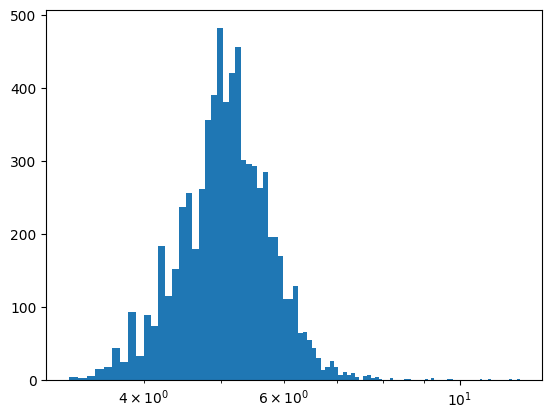

In [22]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


plt.hist(df7['log_price'], bins=100)
plt.xscale('log')
plt.show()
        

`(Task 2, Question 6 Text Here)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [ ]:
#Task 3 code here

`(Task 3 - insert more cells as required)`